In [17]:
import argparse, os
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_auc_score


In [45]:
def read_data(in_score, phe, covar_phe, keep=None):
    df = pd.read_csv(
        in_score, sep='\t', usecols=[1,4]
    ).merge(
        pd.read_csv(
            phe, sep='\t', usecols=[1,2], names=['IID', 'phe']
        ),
        on='IID'
    ).merge(
        pd.read_csv(
            covar_phe, sep='\t', usecols=[1,2,3,5,6,7,8]
        ),
        on='IID'
    )
    df_non_missing=df[df['phe'] != 9]
    if keep is None:
        return df_non_missing
    else:
        return df_non_missing.merge(
            pd.read_csv(
                keep, sep=' ', usecols=[0], names=['IID']
            ),
            on='IID',
            how='inner'
        )

    
def compute_r(x, y):
    lm = LinearRegression().fit(x, y)    
    return np.corrcoef(y, lm.predict(x))[0, 1]

def compute_auc(x, y):
    lm = LogisticRegression(random_state=s, solver='lbfgs').fit(x, y)
    roc_auc = roc_auc_score(y, lm.predict_log_proba(x)[:, 1])
    return max(roc_auc, 1 - roc_auc)

In [34]:
def read_seed(seed_file):
    with open(seed_file) as f:
        s = int(f.read().splitlines()[0])    
    return s

In [35]:
s = read_seed(seed_file='../helper/rand.seed.txt')

In [ ]:
os.

In [24]:
xs = np.arange(10).reshape(10, 1)

In [25]:
ys = np.array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [36]:
lm = LogisticRegression(random_state=s, solver='lbfgs').fit(xs, ys)

In [38]:
lm.predict_proba(xs)[:, 0]

array([0.86298863, 0.80711525, 0.7354417 , 0.6487264 , 0.55094303,
       0.44905681, 0.35127345, 0.26455818, 0.19288465, 0.1370113 ])

In [39]:
roc_auc_score(ys, lm.predict_proba(xs)[:, 0])

0.19999999999999998

In [42]:
roc_auc_score(ys, lm.predict_log_proba(xs)[:, 1])

0.8

In [44]:
max(1, 0)

1

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [9]:
from sklearn.metrics import roc_auc_score

In [2]:
def read_data(in_score, phe, covar_phe, keep=None):
    df = pd.read_csv(
        in_score, sep='\t', usecols=[1,4]
    ).merge(
        pd.read_csv(
            phe, sep='\t', usecols=[1,2], names=['IID', 'phe']
        ),
        on='IID'
    ).merge(
        pd.read_csv(
            covar_phe, sep='\t', usecols=[1,2,3,5,6,7,8]
        ),
        on='IID'
    )
    df_non_missing=df[df['phe'] != 9]
    if keep is None:
        return df_non_missing
    else:
        return df_non_missing.merge(
            pd.read_csv(
                keep, sep=' ', usecols=[0], names=['IID']
            ),
            on='IID',
            how='inner'
        )

In [3]:
def compute_r(x, y):
    lm = LinearRegression().fit(x, y)    
    return np.corrcoef(y, lm.predict(x))[0, 1]


In [12]:
def compute_auc(x, y):
    lm = LinearRegression().fit(x, y)    
    return roc_auc_score(y, lm.predict(x))
    

In [14]:
in_score='/oak/stanford/groups/mrivas/projects/PRS/private_output/vanilla_PRS/5_score/1e-3/ukb24983_v2.INI30150.PHENO1.glm.linear.sscore'
keep='/oak/stanford/groups/mrivas/projects/PRS/private_output/vanilla_PRS/1_split/INI30150.test'
phe='/oak/stanford/groups/mrivas/projects/PRS/private_output/vanilla_PRS/0_input/INI30150.phe'
out_file='/oak/stanford/groups/mrivas/projects/PRS/private_output/vanilla_PRS/6_eval/1e-3/ukb24983_v2.INI30150.PHENO1.glm.linear.sscore.eval'
phe_type='linear'

covar_phe='/oak/stanford/groups/mrivas/private_data/ukbb/24983/sqc/ukb24983_GWAS_covar.phe'


In [5]:
df = read_data(in_score=in_score, phe=phe, covar_phe=covar_phe, keep=keep)


In [6]:
covars=['age', 'sex']+['PC{}'.format(x+1) for x in range(4)]
X1 = df[['SCORE1_AVG']].values
X2 = df[covars + ['SCORE1_AVG']].values
Y  = np.array(df['phe'])


In [15]:
if phe_type in set(['linear', 'qt']):
    results_str='{:.6e}\t{:.6e}'.format(compute_r(X1, Y), compute_r(X2, Y))
elif phe_type in set(['binary', 'bin']):
    results_str='{:.6e}\t{:.6e}'.format(compute_auc(X1, Y), compute_auc(X2, Y))
    

In [16]:
with open(out_file, 'w') as fw:
    fw.write(results_str)

In [8]:
r1, r2

(0.00031338317218780896, 0.09304982034208101)

In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib, collections, itertools, os, re, textwrap, logging
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from functools import reduce

In [3]:
in_score='/oak/stanford/groups/mrivas/projects/PRS/private_output/vanilla_PRS/5_score/1e-3/ukb24983_v2.INI30150.PHENO1.glm.linear.sscore'
keep='/oak/stanford/groups/mrivas/projects/PRS/private_output/vanilla_PRS/1_split/INI30150.test'
phe='/oak/stanford/groups/mrivas/projects/PRS/private_output/vanilla_PRS/0_input/INI30150.phe'
out_file='/oak/stanford/groups/mrivas/projects/PRS/private_output/vanilla_PRS/6_eval/1e-3/ukb24983_v2.INI30150.PHENO1.glm.linear.sscore.eval'

covar_phe='/oak/stanford/groups/mrivas/private_data/ukbb/24983/sqc/ukb24983_GWAS_covar.phe'

In [32]:
def read_data(in_score, phe, covar_phe, keep=None):
    df = pd.read_csv(
        in_score, sep='\t', usecols=[1,4]
    ).merge(
        pd.read_csv(
            phe, sep='\t', usecols=[1,2], names=['IID', 'phe']
        ),
        on='IID'
    ).merge(
        pd.read_csv(
            covar_phe, sep='\t', usecols=[1,2,3,5,6,7,8]
        ),
        on='IID'
    )
    df_non_missing=df[df['phe'] != 9]
    if keep is None:
        return df_non_missing
    else:
        return df_non_missing.merge(
            pd.read_csv(
                keep, sep=' ', usecols=[0], names=['IID']
            ),
            on='IID',
            how='inner'
        )

In [33]:
df = read_data(in_score, phe, covar_phe, keep=keep)

In [27]:
from sklearn.linear_model import LinearRegression

In [42]:
covars=['age', 'sex']+['PC{}'.format(x+1) for x in range(4)]

In [60]:
X1 = df[['SCORE1_AVG']].values
X2 = df[covars + ['SCORE1_AVG']].values
Y  = np.array(df['phe'])


In [61]:
lm1 = LinearRegression().fit(X1, Y)
lm2 = LinearRegression().fit(X2, Y)

In [75]:
r1 = np.corrcoef(Y, lm1.predict(X1))[0, 1]
r2 = np.corrcoef(Y, lm2.predict(X2))[0, 1]

In [76]:
r1, r2

(0.00031338317218780896, 0.09304982034208101)

In [77]:
with open(out_file, 'w') as fw:
    fw.write('{:.4e}\t{:.4e}'.format(r1, r2))

In [78]:
!cat $out_file

3.1338e-04	9.3050e-02

In [47]:
df[covars + ['SCORE1_AVG']].values

array([[ 6.80000e+01,  1.00000e+00, -1.28332e+01, ..., -1.56921e+00,
         6.66705e-01,  6.90431e+04],
       [ 6.90000e+01,  0.00000e+00, -1.04515e+01, ..., -3.33649e+00,
         5.72834e-01,  6.92104e+04],
       [ 7.10000e+01,  0.00000e+00, -1.35059e+01, ..., -2.51258e+00,
         2.05912e+00,  6.95568e+04],
       ...,
       [ 5.00000e+01,  1.00000e+00, -1.30382e+01, ..., -1.94583e+00,
         7.62227e-01,  6.86158e+04],
       [ 6.40000e+01,  0.00000e+00, -1.45310e+01, ..., -2.87338e+00,
        -3.33143e+00,  6.92368e+04],
       [ 7.50000e+01,  1.00000e+00, -1.29570e+01, ..., -2.09221e+00,
         1.85859e+00,  7.26215e+04]])

In [43]:
covars

['age', 'sex', 'PC1', 'PC2', 'PC3', 'PC4']

In [40]:
[x for x in df.columns if x not in set(['IID', 'phe'])]

['SCORE1_AVG', 'age', 'sex', 'PC1', 'PC2', 'PC3', 'PC4']

In [45]:
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

In [4]:
score_file='../private_output/plink_score_INI50_test.sscore'
phe_file='/oak/stanford/groups/mrivas/private_data/ukbb/24983/phenotypedata/ukb9797_20170818_qt/INI50.phe'


In [60]:
covar_df = pd.read_csv(
    covar_phe, sep='\t', usecols=[1,2,3,5,6,7,8]
)

In [26]:
score_df = pd.read_csv(score_file, usecols=[1,2,3,4], sep='\t')

In [27]:
phe_df = pd.read_csv(phe_file, sep='\t', usecols=[1,2], names=['IID', 'phe'])

In [28]:
merged_df = score_df.merge(
    phe_df, on='IID'
)

In [31]:
merged_df.head()

,IID,NMISS_ALLELE_CT,NAMED_ALLELE_DOSAGE_SUM,SCORE1_AVG,phe
0,1000028,27000,5338,0.000070,176.0
1,1000034,26434,5241,0.000082,182.0
2,1000045,27096,5394,-0.000040,156.0
3,1000052,27034,5370,0.000079,159.0
4,1000076,26986,5425,0.000127,175.0


In [48]:
rsquared(
    merged_df['SCORE1_AVG'], merged_df['phe']
)

0.06094146620992523

(array([4.20000e+01, 9.36000e+02, 1.02090e+04, 5.04640e+04, 1.08954e+05,
        1.07412e+05, 4.82420e+04, 1.00300e+04, 8.70000e+02, 3.90000e+01]),
 array([-3.469690e-04, -2.719941e-04, -1.970192e-04, -1.220443e-04,
        -4.706940e-05,  2.790550e-05,  1.028804e-04,  1.778553e-04,
         2.528302e-04,  3.278051e-04,  4.027800e-04]),
 <a list of 10 Patch objects>)

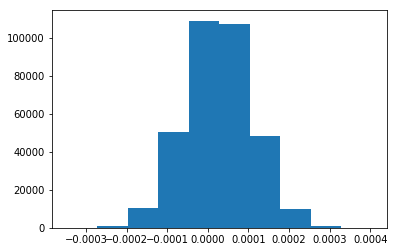

In [35]:
plt.hist(merged_df['SCORE1_AVG'])

(array([7.01000e+02, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        4.00000e+00, 2.17000e+02, 1.31479e+05, 1.97832e+05, 6.96400e+03]),
 array([ -9. ,  12.8,  34.6,  56.4,  78.2, 100. , 121.8, 143.6, 165.4,
        187.2, 209. ]),
 <a list of 10 Patch objects>)

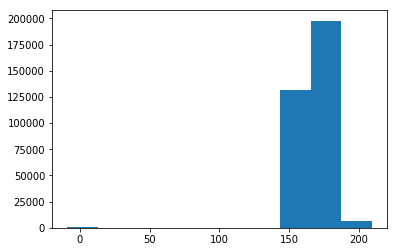

In [36]:
plt.hist(merged_df['phe'])

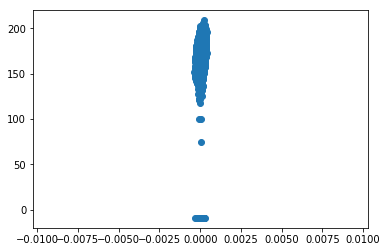

In [37]:
plt.scatter(
    merged_df['SCORE1_AVG'],
    merged_df['phe']
)

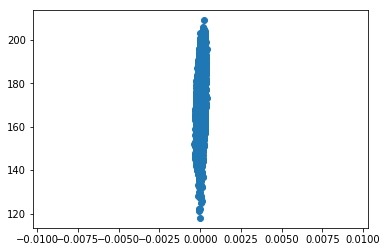

In [38]:
plt.scatter(
    merged_df[merged_df['phe'] > 100]['SCORE1_AVG'],
    merged_df[merged_df['phe'] > 100]['phe']
)

In [50]:
rsquared(
    merged_df[merged_df['phe'] > 100]['SCORE1_AVG'],
    merged_df[merged_df['phe'] > 100]['phe']
)

0.10784323289546859

In [61]:
merged2 = merged_df.merge(
    covar_df, on='IID'
)

In [63]:
merged2.head()

,IID,NMISS_ALLELE_CT,NAMED_ALLELE_DOSAGE_SUM,SCORE1_AVG,phe,age,sex,PC1,PC2,PC3,PC4
0,1000028,27000,5338,0.000070,176.0,54.0,0,-13.9881,3.69742,-0.379325,2.415610
1,1000034,26434,5241,0.000082,182.0,68.0,1,-12.8332,2.76107,-1.569210,0.666705
2,1000045,27096,5394,-0.000040,156.0,79.0,0,-14.0366,6.47430,-0.437916,4.497090
3,1000052,27034,5370,0.000079,159.0,72.0,0,-15.4658,3.81758,-0.301443,-0.635698
4,1000076,26986,5425,0.000127,175.0,72.0,1,-11.1046,1.52203,-1.565340,5.450450


In [64]:
from sklearn.linear_model import LinearRegression

In [67]:
X = merged2[['age', 'sex', 'PC1', 'PC2', 'PC3', 'PC4']].values

In [70]:
y = np.array(merged2['phe'])

In [71]:
reg = LinearRegression().fit(X, y)

In [72]:
reg.coef_

array([-1.63201178e-01,  1.32173668e+01,  4.01935167e-02, -4.93185741e-03,
        2.78813948e-04, -1.47628213e-01])

In [73]:
merged2['residuals'] = y - reg.predict(X)

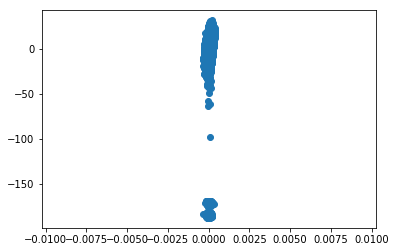

In [75]:
plt.scatter(
    merged2['SCORE1_AVG'],
    merged2['residuals']
)

In [76]:
rsquared(
    merged2['SCORE1_AVG'],
    merged2['residuals']

)

0.08529141174296834

In [82]:
full_model = LinearRegression().fit(
    merged2[merged2['phe'] != -9][['age', 'sex', 'PC1', 'PC2', 'PC3', 'PC4', 'SCORE1_AVG']].values,
    np.array(merged2[merged2['phe'] != -9]['phe'])
)


In [83]:
full_model.score(
    merged2[merged2['phe'] != -9][['age', 'sex', 'PC1', 'PC2', 'PC3', 'PC4', 'SCORE1_AVG']].values,
    np.array(merged2[merged2['phe'] != -9]['phe'])    
)

0.638325979670902